# <center> Numerical Physics with Probabilities: The Monte Carlo Method and General Probability

    
    
<center> Department of Physics, University of Surrey module: Energy, Entropy and Numerical Physics (PHY2063)

## Table of Contents:

* [Numerical Physics part of Energy, Entropy and Numerical Physics](#EENP-intro)
* [Very brief background note on probabilities](#background-probability)
* [Pseudo-Random Numbers](#pseudo-random)
* [The Central Limit Theorem](#central-limit-theorem)
* [Task 1](#task-1)
* [Bayes' Theorem](#bayes)
* [Monte Carlo Methods](#monte-carlo)
* [Task 2](#task-2)

#### Learning Objectives:
> Learn pseudo random numbers and their use in numerical physics

> Understand some simple probability theory concepts, CLT and law of large numbers

> Demonstrate this understanding by showing how CLT works in real world scenarios and how it fits what we anecdotally expect

> Serve as an introduction to the numpy random package 

> Develop understanding of how Monte Carlo methods work, why they're useful and how to code them

> A look at the errors in Monte Carlo processes and proportionality with N


## 1) Numerical Physics part of Energy, Entropy and Numerical Physics <a class="anchor" id="EENP-intro"></a>

This numerical physics course is part of the second-year
Energy, Entropy and Numerical Physics module.
It is online at the EENP module on SurreyLearn.
See there for assignments, deadlines etc.
The course is about numerically solving ODEs (ordinary differential equations) and
PDEs (partial differential equations), and introducing the (large)
part of numerical
physics where probabilities are used as well as some more general data analysis.

This assignment is on numerical physics of probabilities, and
looks at the Monte Carlo (MC) method, a section of fitting techniques, section on uncertainty estimates and
at the Bayesian statistics approach to data analysis. 
It covers MC, uncertainty, fitting and Bayesian statistics, in that order, across 4 notebooks.

MC is a widely used numerical
technique, it is used, amongst other things,
for modelling many random processes.
MC is used in fields from statistical physics,
to nuclear and particle physics.

Many of you will be analysing data (physics data, commercial data, etc) for
your PTY or RY, or future careers. And some will using MC or related modelling techniques.

(Davenport and Patil, in the Harvard Business Review,
called the job of data scientist "the sexiest job of the 21st century"
https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century )



## 2) Very brief background note on probabilities <a class="anchor" id="background-probability"></a>

You have come across probability before, for example, in quantum
physics, and in introductory data analysis. If you want a reminder/description
of what is meant by probability/randomness then the Wikipedia
Probability page is worth a look.

Note on math notation: We will working with probabilities,
these are dimensionless things between 0 and 1, where a probability of 0 means something
never-happens/is-impossible, and a probability of 1 means something
always-happens/is-certain-to-happen. We will also be working with
probability density functions, which in general have the dimension
of one over the variable they depend on, and vary from 0 to $\infty$.
For example, a probability density function for a variable $x$ which
has units of metres, $p(x)$, is defined so that the probability
that the variable $x$ lies between $x$ and $x+{\rm d}x$, is
$p(x){\rm d}x$. As $p(x){\rm d}x$ is a probability, it
is dimensionless and so $p(x)$ has dimensions of
m$^{-1}$ (${\rm d}x$ has dimensions of m).

## 3) Pseudo-Random Numbers <a class="anchor" id="pseudo-random"></a>

To implement MC algorithms we need long sequences of random numbers.
In practice numerical physics does not use
sequences of true random numbers,
but sequences of what are called
pseudo-random numbers. A sequence of pseudo-random numbers
is actually deterministic not random in the sense that if you run
the program twice you get the same sequence of numbers.
However, the sequence depends on the value of a variable called
seed, so you can change that variable and get a different sequence.

A pseudo-random-number sequence
 looks random in the sense that if you look at it
you cannot distinguish it from a genuinely random sequence
of numbers.
For techniques like MC methods pseudo-random numbers
are just as good
as random numbers.

The simplest pseudo-random sequence
 is a sequence of $N$ pseudo-random numbers
uniformly distributed between 0 and 1. This is defined by:


>1) The numbers in the sequence of pseudo-random numbers must be uniform
in the sense that the numbers are equally likely to fall in
any small range of values between $x=0$ and $x=1$, i.e., for any values
of $x$ and $\delta$, the average number of the numbers in the sequence
in the range $x$ to $x+\delta$, is the same.

>2) They must be no correlations between numbers in the sequence,
i.e.,  the value of one number in the sequence should tell you nothing
about the value of the next number. For example, if one number in the sequence
is close to 0, this should not mean that the next number is also close to 0.


Any sequence that satisfies these requirements can be used in MC
programs. For this unit I will be using the numpy.random module but there are
many other packages that can serve you with random numbers for instance there
is an inbuilt random package in python that can be imported too. However it should
be noted that bilt in random generators can give results that vary from one
compiler to another, and in some cases they are not perfectly
random. Both these things are highly undesirable in research that uses
MC codes.

The main reason why I will be using the numpy package is that firstly we will
likely be using it anyway for its array capabilities but secondly it has built
in functions that allow it to pull random numbers from many different distributions
which is convenient for us. For instance to pull values from an exponential distribution
we can use numpy.random.exponential() and there are functions for all of the most commonly
used distributions.

In [2]:
# random numbers demo

import numpy as np

# setting a seed so the random number will be the same when ran each time. (If seed is commented out then different each time)
# the random() function will return a random value between 0 and 1.
np.random.seed(12345678)
print(np.random.random())

# to show that it is psuedo random we can see what proportion of results are above/below the central value:
rand_vals = np.random.random(10)
#print(rand_vals)    # uncomment this to see all 10 nums

larger_than_mp = (rand_vals>0.5)
print('Of the',len(larger_than_mp), 'random points', sum(larger_than_mp), 'were above the midpoint value.', 100*sum(larger_than_mp)/len(larger_than_mp), '%')

# If you run this multiple times you'll see sometimes it is above the average (5) and sometimes below.
# additionally if you increase the amount of numbers being pulled from 10 then you'll find the number above/below
# the midpoint converge to the expected 50%. This is a good example of measuring stochastic probability.
# It also demonstrates the law of large numbers and how when we are determining probabilities in computing
# we are simply running an event many times and then measuring the proportion that meet a criteria

0.24580423382490257
Of the 10 random points 4 were above the midpoint value. 40.0 %


## 4) The Central Limit Theorem <a class="anchor" id="central-limit-theorem"></a>

In probability theory (the branch of mathematics associated with probability) there are several theorems that are quite intuitive and so you may already understand without formally knowing what they are. The Central Limit Theorem (CLT) may be one of these but we are going to study it properly here as it occurs frequently in Physics particularly Numerical Physics and so it is important you understand it. 

What the CLT states is that in some cases when independant random variables are added their normalised sum tends towards a normal distribution even if the measurements themselves don't necessarily follow a normal distribution.

A simple example of this is the amount of heads or tails expected in a series of flips. 

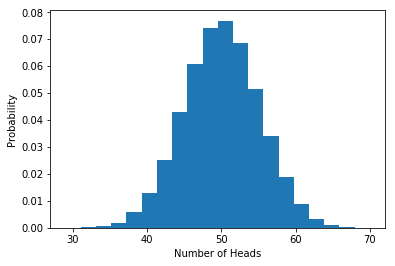

In [5]:
# numpy random ints with 0 signifying a tails and 1 a heads.
import numpy as np
from matplotlib import pyplot as plt

flips = []

# see what happens to the histogram below when you play around with how many times you iterate this loop (repeat the experiment)
# and as you change the number of bins in the histogram
for i in range(100000):
    flips.append(sum(np.random.randint(2, size=100)))

plt.hist(flips,bins=20, normed=True)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
#plt.xlim(40,60)
plt.show()

So what the above code clearly shows is that in the limit of large N, or in our case repeating the 100 flips experiment many times the expected results from it appear to follow a normal distribution. This is dispite the fact that flipping a coin clearly won't follow a normal distribution its own results as it either returns 1 or 0.

What the above histogram represents is how many heads you're likely to flip if you flip the coin 100 times. As we are only using finite N with psuedo random numbers each time you run the code again it will be slightly different (or drastically so in the case of small N). Hopefully what you realised from changing the number of iterations is that greater N makes the histogram appear to follow a normal distribution more closely, and so from that it becomes apparent that for a sample of infinte N it would be a normal distribution curve (in our case with a mean equal to half the total number of flips).

The reason why you may have been familiar with the results of the CLT is that it occurs very frequently and explains the common occurance of the normal distribution or "bell curve" for 'real world' data such as electronic noise, examination results and distance covered in random walks. So even though you may not have been familiar with the CLT itself it is very likely you would have experienced the results that it gives you. 

## Task 1) <a class="anchor" id="task-1"></a>

Write a python program in the box below to demonstrate the CLT but for the case of rolling a fair six sided die. (Although you can expeirment with other sided die if you'd like.) 

Start by plotting a histogram of the dice rolls and you should find that they are all equally likely for one instance, then investigate plotting the sum of multiple dice rolls and show how it demonstrates the CLT.

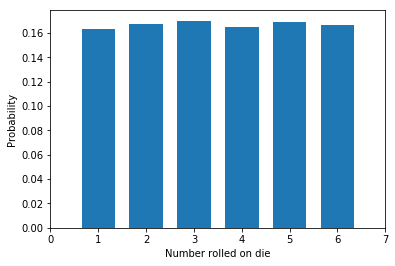

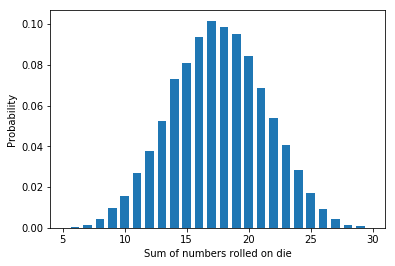

In [8]:
### BEGIN SOLUTION 

import numpy as np
from matplotlib import pyplot as plt

# instance of plotting a single fair die.
rolls = np.random.randint(6, size=10000)+1
bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5]

plt.hist(rolls,bins=bins, density=True, rwidth=0.7)
plt.xlabel('Number rolled on die')
plt.ylabel('Probability')
plt.xlim(0,7)
plt.show()
    

# example of multiple dice rolls summed - this histogram will demonstrate the CLT
for i in range(4):
    rolls += np.random.randint(6, size=10000)+1

bins = np.arange(4.5,30.5,1)

plt.hist(rolls, density=True, rwidth=0.7, bins=bins)
plt.xlabel('Sum of numbers rolled on die')
plt.ylabel('Probability')
plt.xlim(4,31)
plt.show()
    
### END SOLUTION

## 5) Bayes Theorem <a class="anchor" id="bayes"></a>

Bayesian probability is an interpretation on the nature of probability, so rather than being a direct measure of the liklihood of some phenomenon, probability is interpretted as reasonable expectation representing a state of knowledge. This sounds complicated but what it really means is simply that for a hypothesis which may or may not be true it has a probability assigned to it, and as new information is discovered the certainty of the hypothesis changes. The alternative to this being the frequentist approach which usually tests a hypothesis without assigning a probability to the hypothesis, we won't be covering frequentist inference in this notebook although you will have already used it even if you weren't aware at the time. If you would like to learn more on it see the wikipedia page, https://en.wikipedia.org/wiki/Frequentist_inference.

In a physics experiment you are usually trying to measure a physical quantity
as accurately as possible.
This might be, for example, the mean lifetime $\tau$
of a radioactive isotope. It could also
be one of millions of other measurable quantities: the
mass of a star, the mass of a fundamental particle etc etc.
Typically, at the start of the experiment you have a rough
idea of the lifetime $\tau$,
and you want to use the
results of your experiments to improve
upon this initial rough guess. You want
to not only obtain an accurate estimate of the value of $\tau$, 
but also to obtain an error estimate. This
error estimate should give you as much information about
the uncertainty in your estimate for $\tau$ as possible.

Bayes' Theorem is one of the best ways of incorporating
new knowledge into an existing estimate of the value of a variable so that
our uncertainty in this value is reduced by the new data.
This idea is essentially
something we use informally all the time but without the maths.
For example, if I tell you that $X$ is a footballer then the
probability that they are a forward is about $2/11$ 
(assuming a 4-4-2 formation) but if I tell you that
they scored 20 goals last season then presumably the footballer is either
a forward or an attacking midfielder and so now you would update your estimate
and say that
the probability that they are a forward is about $1/2$. Bayes'
theorem takes this basic idea and converts it into an equation. For more information or a background on Bayes theorem can be found on the wikipedia article at, https://en.wikipedia.org/wiki/Bayesian_inference, or alternatively in many statistical notebooks as it is a widely used and so discussed topic.

We are going to learn how to use Bayes' Theorem via a simple example. Estimating the bias for a coin. In the above notes on the CLT we assumed the coin was fair but now we will use a randomly selected bias for a coin and then use Bayes theorem to work out what the value of the bias is.

For more notes looking at this specific problem please see: https://www.probabilisticworld.com/calculating-coin-bias-bayes-theorem/. This was what I based this example from and it explains the whole procedure and surrounding theory very well.

### 5.1) How unfair is my coin?

The first step required to code this example is understanding how bayes theorem works. The theorem is:
<br>
<center>
$ p(A|B) = \frac{p(B|A)~*~p(A)}{p(B)} $


So the posterior probability of event A given evidence B is equal to the likelihood of the evidence B given event A occurs multiplied by the prior probability of A occuring all divided by the prior probability that the evidence B is true. There is a useful video for visualising this done by khan academy that can be found here: https://www.khanacademy.org/math/ap-statistics/probability-ap/stats-conditional-probability/v/bayes-theorem-visualized

Fortunately in our example the numbers for these probabilities are very simple, the value of A is likelihood to throw a head and B is probability of a coin having a given bias. So 

$p(heads|Bias=0.7) = 0.7$ 

this is assuming the bias is quoted in relation to likelihood of throwing a head and thus $p(tails|Bias=0.7)~=~0.3$ 

### 5.2) Starting estimate: the Prior probability density

The next thing we need is to set an initial guess for the probability density since this is needed to narrow down the true bias of the coin. As we initially have no information we should set each region as being equally as likely to be the true value of the bias. 

\begin{array}{cc}
0 &  bias < 0  \\
\frac{1}{num.~intervals} & 0 \le bias \le 1~ \\
0 &  bias > 1
\end{array}

This is obviously a very simple probability space since we know that our coin can potentially have any value of bias but since bias is in itself just a probability of how many heads will be thrown it can never be above 1 or below 0. Then between those values to begin with all are equally likely.

### 5.3) Coding Bayes' Theorem

First we will need to discretise the heads bias axis, this obviously limits our accuracy but in our case this is irrelevant and we can always make the intervals smaller if we need more accuracy (at the expense of speed). So for this we need to discretise the range of 0 to 1 (inclusive) and I have chosen to use intervals of 0.01. Leaving us with an array of 101 elements.

We then set up the prior array for our initial guesses of the probabilities. As discussed above this is equally likely for any of our elements at first so simply setting the value for each of them as $1/101$. Additionally we also need to 'flip a coin' and determine whether it is heads or tails, for this we simply pull a random number between 0 and 1 and check if it is less than our bias, if so it is a head (True) else it's a tails (False).

We are now ready to improve the estimation for our bias value by looping through our coin tosses and applying bayes theorem for each one.

It is worth noting that as we increase the number of coin flips the peak is going to become larger and narrower as Bayes' makes us more confident in the value of the bias of the coin. Try it for yourself below by changing 'number_of_flips'.

You can see the coded solution to our example below.

The true value of the coin throwing a head is 0.3


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


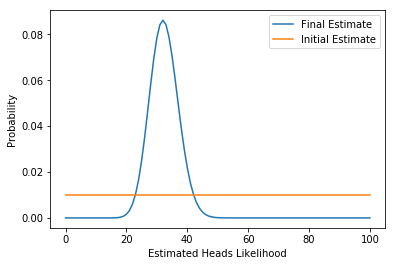

In [11]:
# code that demonstrates bayes theorem for example of flipping a coin

# range of potential biases (0 to 1 discretised into 0.01 intervals)
bias_vals = np.arange(0,1.01,0.01)

# original_prob array is a uniform distribution as could have any level of bias
original_prob = np.full(len(bias_vals), 1/len(bias_vals))
p_bias_heads = original_prob

# setting bias of coin - pick specific value to see peak there
heads_bias = 0.3
#heads_bias = np.random.random()

number_of_flips = 100
# np array which contains our flip vals, True is heads False is tails
flips = np.random.random(size=number_of_flips)
flips = flips<heads_bias

for i in flips:
    # calculating all 3 terms in the theorem for this iteration
    prior = p_bias_heads
    likelihood = bias_vals**i*(1-bias_vals)**(1-i)
    evidence = sum(likelihood * prior)

    # updated values of the p_bias due to bayes theorem
    p_bias_heads = likelihood * prior / evidence
    

# plotting outcome
plt.xlabel('Estimated Heads Likelihood')
plt.ylabel('Probability')
plt.plot(p_bias_heads, label='Final Estimate')
plt.plot(original_prob, label='Initial Estimate')
plt.legend()

print('The true value of the coin throwing a head is', heads_bias)

## 6) Monte Carlo Methods <a class="anchor" id="monte-carlo"></a>

The Monte Carlo (MC) method gets its name from the part of Monaco famous
for its casinos. It is named
after casinos because it involves a lot of random numbers. In practice it
is not really one
method, but a set of related methods. These methods are used all over
physics, from particle and
nuclear physics, to statistical physics.
They are often used to model random processes.

For example, when ionising radiation is going through matter, the particles
($\alpha$ and $\beta$ particles, and photons) scatter off, and
are absorbed, by atoms. Both scattering and adsorption are random
processes and so are often modelled using MC techniques.
Particle, nuclear and medical physicists all use MC codes
to calculate the interaction of radiation with matter. 

Nuclear
and particle physicists need to design detectors that absorb and so detect as
many as possible of the particles produced (e.g., the particles
produced by proton-proton collisions used at the LHC in CERN to detect the Higgs boson)
while medical physicists want to design a radiotherapy
protocol that delivers as high a dose as possible to the cancer tumour,
and as little as possible to healthy tissue. There are MC codes
available to do these calculations, called FLUKA, GEANT and SRIM.
These are big complex codes, but Task 2 should give you an idea
of the principles they use.

### 6.1) Monte Carlo Estimation of $\pi$

So often MC is used to model random processes but it can do a
lot of other things as well. We will start with a simple classic example.
We will use a simple MC method to
produce an estimate for $\pi$. Note that this is just to show
how MC methods work, there are much more efficient ways
to calculate $\pi$.
Of course, there is nothing random
about $\pi$ but we can use MC to calculate a probability
that depends on $\pi$, and so estimate $\pi$.

To see how this works,
run the code block below as it will produce a useful graph. This shows
a square of side 2, and hence area 4, which has a circle of radius 1
in side it. The circle has an area of $\pi$. Both the square and the circle
are centred at the origin,
and both are in the $xy$ plane.

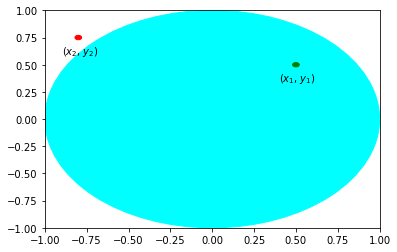

In [25]:
from matplotlib import pyplot as plt

# plot to produce diagram of circle with points
# Note some of the plt.functions that I have used as they come in handy for producing better plots/images
plt.figure(figsize=(8,8))
circle = plt.Circle((0,0),1, color='cyan')
point_out = plt.Circle((-0.8,0.75),0.02, color='red')
point_in = plt.Circle((0.5,0.5),0.02, color='green')
fig, ax = plt.subplots() 

ax.add_artist(circle)
ax.add_artist(point_in)
ax.add_artist(point_out)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.text(0.4,0.35,'($x_1$, $y_1$)')
plt.text(-0.9,0.6,'($x_2$, $y_2$)')
plt.show()

What the above code has produced is a square of side length 2, centred at the origin,
with a circle of radius 1 inside it. Both are in the $xy$ plane.
Shown are two points inside the square in the $xy$ plane.
Each point is indicated by the vector position $(x_i,y_i)$.
One is inside the circle, and one is outside.

To obtain an estimate for $\pi$, we proceed as follows.
First, we generate a random number, $x_1$,
uniformly between $-1$ and $+1$; we take this as our random position
along the $x$ axis, and inside the square. We then generate a second
random number, $y_1$, between $-1$ and $+1$ and take this to be
to our random position along the $y$ axis. This pair
of numbers, $(x_1,y_1)$ is then a position vector for a point that
is distributed at random within the square in shown above.

We then put generating this position vector inside a do loop and generate
a set of $N$ random points inside the square:
$(x_1,y_1)$, $(x_1,y_2)$, $(x_3,y_3)$, $\ldots$, $(x_N,y_N)$.
See the 'Random numbers' box below for how we calculate random numbers
on a computer.

Now the MC method for estimating $\pi$ works as follows. The probability that a
randomly selected point inside the square falls inside the circle,
call it $p_{circ}$, is simply the ratio of the area of the circle
to the area of the square

$$
p_{circ}=\frac{\mbox{area of circle}}{\mbox{area of square}}=\frac{\pi}{4}
$$

but for large $N$, $p_{circ}$ is well approximated by the fraction
of the $N$ random points that fall inside the circle. If we write
the number of points that fall inside the circle as $N_{circ}$, then

$$
p_{circ}\simeq\frac{N_{circ}}{N}
$$

Combining these two equations we get

\begin{equation}
\pi_{est}\simeq \frac{4N_{circ}}{N}
\label{pi_est}
\end{equation}

To calculate the right-hand side all we do is generate say $N=1000$
points inside the square, using a for loop. Then for each point we work out if it is inside the
circle, and so calculate $N_{circ}$.
With 
values for $N$ and $N_{circ}$, we can use the above
equation and get $\pi_{est}$, which is our estimate for the value of $\pi$. Simple.

### 6.1.1) Coding the MC estimation of $\pi$

To generate the pairs $(x_i,y_i)$ we need random numbers in the range $-1$ to $+1$.
The numpy.random package has many functions that are useful getting random numbers,
specifically for this problem  we will be using the function, numpy.random.random.
This function returns us an array with a shape we determine filled with random numbers
in the interval of 0 to 1. This means we will need to operate on it to get random numbers
in the range we want.

In order to do this we simply need to multiply the values of the array by 2 then subtract 1
from every value then it will be in the correct range. (Or minus 0.5 then multiply by 2 after).

So we need to generate a suitable amount of random points for our MC estimation, and we need to do this
for both the x and y directions. After this is done we can simply create a third array which is the
radial distances of the pairs of x,y values by operating on both arrays (as numpy arrays support index-index
operations).

The final step is to check which of the points lay within the area of the circle, this is done 
by seeing if the radial distance value is less than 1. Numpy arrays also support comparisons which returns 
a boolean array of the same size, then since python treats True as being equal to 1 and False as 0 we
can simply sum this array to determine how many fall within the range of the circle. It's then simply a case
of applying the equation we derived above for the estimation of $\pi$ since we know all the variables know.

This isn't the only way to implement this solution, you could also do it using a for loop and pulling random
numbers each iteration it would just be less efficient. You will often find in programming there are multiple 
ways to solve the same problem.

## Task 2) <a class="anchor" id="task-2"></a>

Write a python program in the box below to estimate the value of $\pi$.
This should generate $N$ points inside a square of
side 2, as  shown in the above figure.
Then $\pi$ is estimated by calculating the fraction of
these $N$ points that lie within a circle of radius 1 inside this square, and then 
using the equation derived to calculate $\pi$.

The program should write out the estimate for $\pi$, $\pi_{est}$,
the error, i.e, $\pi_{est}-\pi$ and the number of points
used, $N$. If you increase $N$ you should
see that the error decreases.

Run the program multiple times with increasing and decreasing values on $N$, then
plot how this effects the error, does it decrease linearly with $N$, $N^2$, $N^{1/2}$?
Hint: do a log log plot then fit linearly to the data.


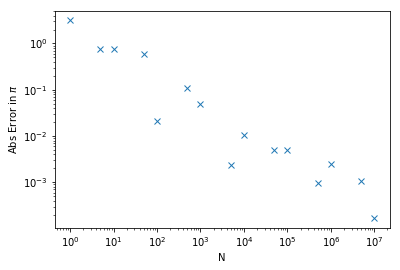

In [23]:
### BEGIN SOLUTION 

import numpy as np

N_vals = np.array([1,5,10,50,100,500,1e3,5e3,1e4,5e4,1e5,5e5,1e6,5e6,1e7])
N_vals = N_vals.astype(int)
errors = []

for N in N_vals:
    # number of points for MC estimation
    x_vals = (np.random.random(N)*2)-1
    y_vals = (np.random.random(N)*2)-1

    radial_dists = (x_vals**2 + y_vals**2)

    # checking if radial dist < 1    i.e in circle
    N_circle = sum(radial_dists<1)

    pi_est = (4*N_circle)/N
    errors.append(abs(np.pi - pi_est))
    # outputs
    #print('The value for the estimate of pi is', pi_est)
    #print('Meaning we have an error of', abs(np.pi - pi_est))
    #print('Which was obtained using', N, 'points.')
    #print('----------------------------------------------------------------')

plt.plot(N_vals, errors, marker='x', linestyle='')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Abs Error in $\pi$')
plt.show()
### END SOLUTION

## 6.2) MC estimation errors decrease slowly, $N^{-1/2}$

As with essentially all numerical methods, MC methods do not
calculate exact answers, they calculate approximate estimates.
In fact MC methods give answers that are typically not that accurate, often
there are uncertainties of at least a few $\%$.
This is because the error bars on quantities estimated
using MC methods usually only
decrease in size as $1/N^{1/2}$, which is a slow decrease:
we need to multiply $N$ by 100 to reduce the error by a factor of 10.
This is a direct consequence of what is called the Central Limit
Theorem (CLT) of statistics. See any statistics textbook, the Wikipedia page, etc,
for definitions of the CLT.  https://en.wikipedia.org/wiki/Central_limit_theorem

The CLT is part of the second year Energy and Entropy lectures as
it is very important in statistical physics. It will be discussed later in this 
notebook.

For the MC estimation of $\pi$, the error as a function of $N$
is what you just worked out in the second half of the task. 
Note that we need $N$ of order 1 million to get
$\pi$ with an accuracy of one part in a thousand. The
error decreases with increasing $N$, just as the error in integrating
an ODE decreases as the step size $h$ decreases. However, the error in MC
methods is statistical, i.e., is random. If you change the random numbers
in your program then the error will change, it may get bigger or smaller.
Although on average the error is approximately $1/N^{1/2}$,
as it is statistical sometimes by chance it is a bit bigger and sometimes
it is a bit smaller.